<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroMLPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles

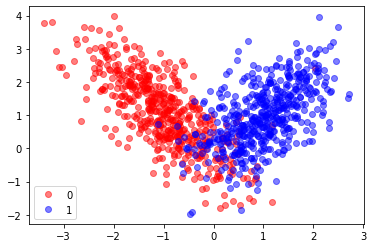

In [83]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)

figsize = (8, 4)
fig = plt.plot(figsize=figsize)
plt.plot(X[y==0, 0], X[y==0, 1], 'ro', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'bo', alpha=0.5, label=1)
plt.legend()

In [84]:
#Split Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # TRAIN TEST SPLIT

(348, 355)


([], <a list of 0 Text major ticklabel objects>)

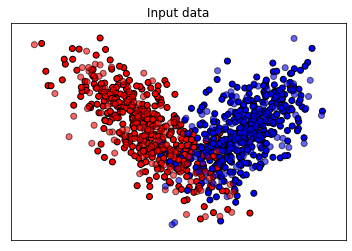

In [85]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

h = 0.02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.shape)

# just plot the dataset first
fig = plt.plot()
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.title("Input data")
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [130]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable]

# **Linear classifiers**

In [43]:
#Linear classifiers/Regressor
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor

names_linearCl = ['LogisticReg', 'PassiveAggressiveClass', 'Perceptron', 'RidgeClass', 'SGDClass', 
                  'Ridge','SGDReg', 'LinearReg']

classifiers_linearCl = [LogisticRegression(), PassiveAggressiveClassifier(), Perceptron(), RidgeClassifier(), SGDClassifier(),
                        Ridge(), SGDRegressor(), LinearRegression()]

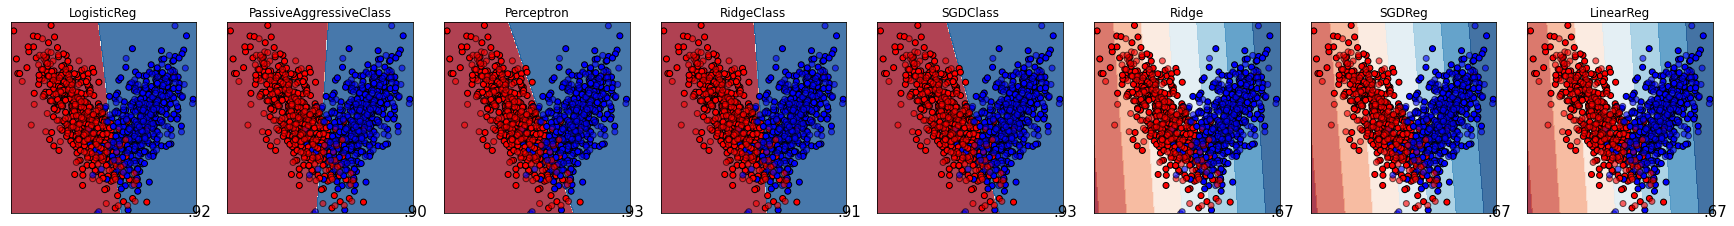

In [44]:
figure = plt.figure(figsize=(27, 9))
i = 1

amin, bmin = X_train.min(axis=0) - 0.1
amax, bmax = X_train.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 300)
vticks = np.linspace(bmin, bmax, 300)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

for name, clf in zip(names_linearCl, classifiers_linearCl):
  ax = plt.subplot(len(datasets), len(classifiers_linearCl) + 1, i)
  model = clf.fit(X_train, y_train)
  score = model.score(X_test, y_test)

  c = model.predict(ab)
  cc = c.reshape(aa.shape)
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  ax.contourf(aa, bb, cc, cmap=cm, alpha=0.8)

# Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
  ax.set_xlim(amin, amax)
  ax.set_ylim(bmin, bmax)

# Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
  ax.set_xticks(())
  ax.set_yticks(())
  
  ax.set_title(f'{name}')
  ax.text(aa.max() - 0.3, bb.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, va="top")
  i += 1

plt.tight_layout()
plt.show()

# **Regression with variable selection**

In [79]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from sklearn.linear_model import ARDRegression, BayesianRidge

names_variableRe = [ 'ElasticNet', 'ElasticNetCV', 'Lars', 'Lasso', 'LassoLars', 'LassoLarsIC',
                    'OrthogonalMatchingPursuit', 'ARDRegression', 'BayesianRidge']

classifiers_variableRe = [ ElasticNet(random_state=0, alpha=0.1), ElasticNetCV(l1_ratio=0.005, selection ='random'), 
                          Lars(random_state=0), Lasso(random_state=0, alpha=0.1), LassoLars(random_state=42, alpha=0, max_iter=1000), 
                          LassoLarsIC(), OrthogonalMatchingPursuit(), ARDRegression(), BayesianRidge()]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

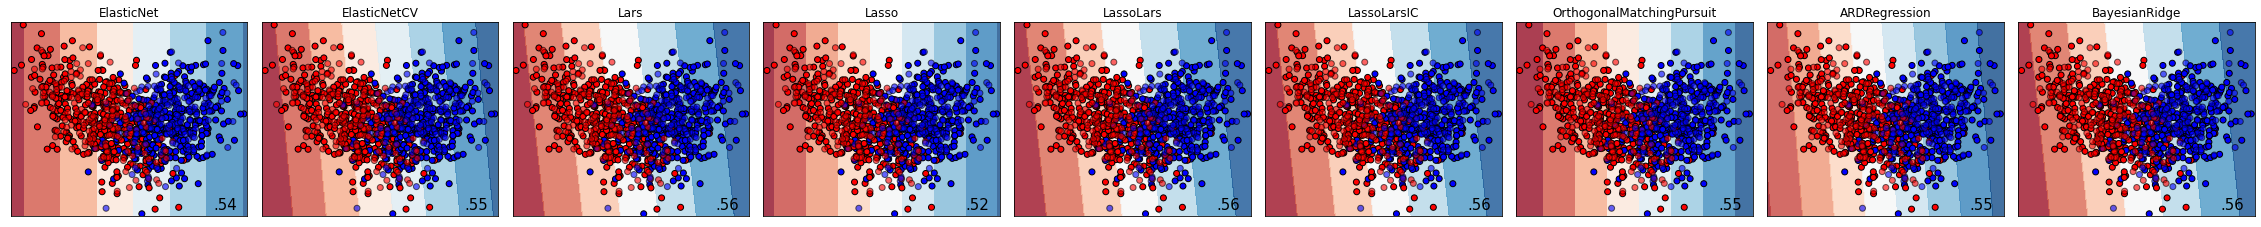

In [80]:
figure = plt.figure(figsize=(35, 9))
i = 1

amin, bmin = X_train.min(axis=0) - 0.1
amax, bmax = X_train.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 300)
vticks = np.linspace(bmin, bmax, 300)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

for name, clf in zip(names_variableRe, classifiers_variableRe):
  ax = plt.subplot(len(datasets), len(classifiers_variableRe) + 1, i)
  model = clf.fit(X_train, y_train)
  score = model.score(X_test, y_test)

  c = model.predict(ab)
  cc = c.reshape(aa.shape)
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  ax.contourf(aa, bb, cc, cmap=cm, alpha=0.8)

# Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
  ax.set_xlim(amin, amax)
  ax.set_ylim(bmin, bmax)

# Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
  ax.set_xticks(())
  ax.set_yticks(())
  
  ax.set_title(f'{name}')
  ax.text(aa.max() - 0.3, bb.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right",)

  i += 1

plt.tight_layout()
plt.show()

# **Plot Outlier-robust regressors**

In [111]:
#outliner
from sklearn.linear_model import HuberRegressor, QuantileRegressor, RANSACRegressor, TheilSenRegressor

from sklearn.linear_model import PoissonRegressor, TweedieRegressor, GammaRegressor

names_out = ['HuberRegressor', 'QuantileRegressor', 'RANSACRegressor', 'TheilSenRegressor',
             'PoissonRegressor', 'TweedieRegressor', 'GammaRegressor']
class_out = [HuberRegressor(), QuantileRegressor(alpha=0), RANSACRegressor(random_state=1), TheilSenRegressor(),
             PoissonRegressor(), TweedieRegressor()]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


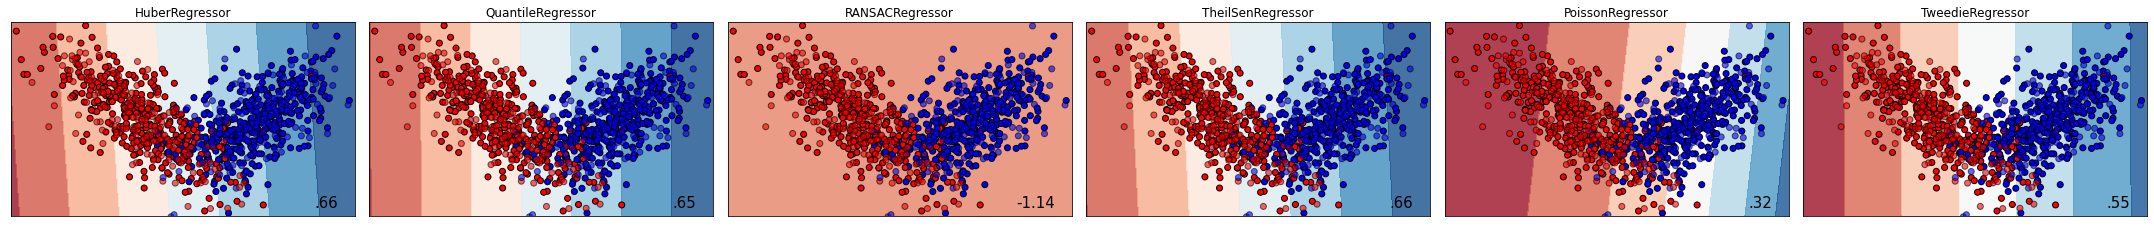

In [112]:
figure = plt.figure(figsize=(35, 9))
i = 1

amin, bmin = X_train.min(axis=0) - 0.1
amax, bmax = X_train.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 300)
vticks = np.linspace(bmin, bmax, 300)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

for name, clf in zip(names_out, class_out):
  ax = plt.subplot(len(datasets), len(class_out) + 1, i)
  model = clf.fit(X_train, y_train)
  score = model.score(X_test, y_test)

  c = model.predict(ab)
  cc = c.reshape(aa.shape)
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  ax.contourf(aa, bb, cc, cmap=cm, alpha=0.8)

# Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
  ax.set_xlim(amin, amax)
  ax.set_ylim(bmin, bmax)

# Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
  ax.set_xticks(())
  ax.set_yticks(())
  
  ax.set_title(f'{name}')
  ax.text(aa.max() - 0.3, bb.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right",)

  i += 1

plt.tight_layout()
plt.show()

# **Plot NN**

In [128]:
#NN
from sklearn.neural_network import BernoulliRBM, MLPClassifier, MLPRegressor
from sklearn.decomposition import PCA #unsupervised

names_nn = ['MLPClassLr001', 'MLPClassLr01', 'MLPClassLr1', 'MLPClassLr10', 'MLPReg01', 'MLPReg1', 'MLPReg10']
Class_nn = [MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', 
                          alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001), 
            MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', 
                          alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.1),
            MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', 
                          alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=1),
            MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', 
                          alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=10),
            MLPRegressor(alpha=0.1, max_iter=1000), MLPRegressor(alpha=1, max_iter=1000), MLPRegressor(alpha=10, max_iter=1000)]

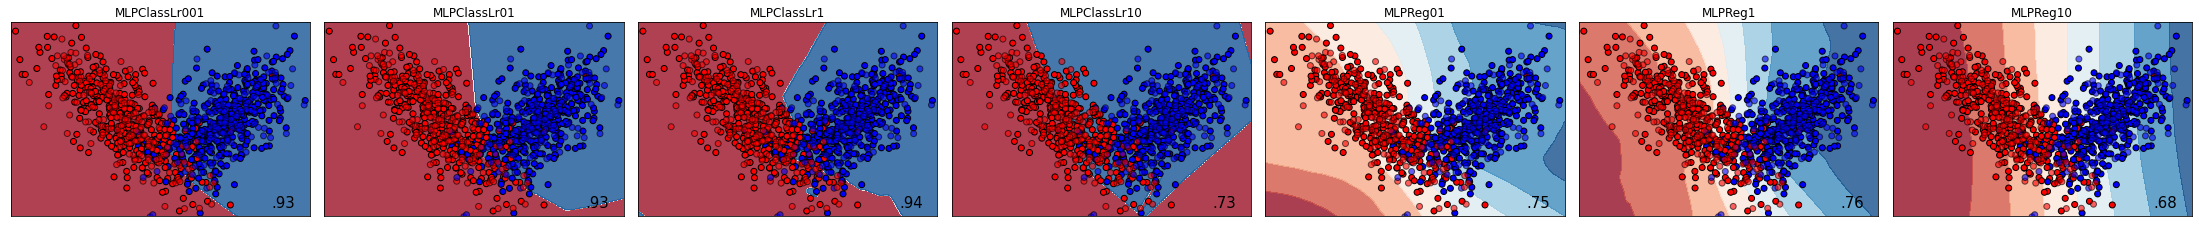

In [131]:
figure = plt.figure(figsize=(35, 9))
i = 1

amin, bmin = X_train.min(axis=0) - 0.1
amax, bmax = X_train.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 300)
vticks = np.linspace(bmin, bmax, 300)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

for name, clf in zip(names_nn, Class_nn):
  ax = plt.subplot(len(datasets), len(Class_nn) + 1, i)
  model = clf.fit(X_train, y_train)
  score = model.score(X_test, y_test)

  c = model.predict(ab)
  cc = c.reshape(aa.shape)
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  ax.contourf(aa, bb, cc, cmap=cm, alpha=0.8)

# Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
  ax.set_xlim(amin, amax)
  ax.set_ylim(bmin, bmax)

# Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
  ax.set_xticks(())
  ax.set_yticks(())
  
  ax.set_title(f'{name}')
  ax.text(aa.max() - 0.3, bb.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right",)

  i += 1

plt.tight_layout()
plt.show()

# **Plot Cluster**

In [132]:
#Cluster
from sklearn.cluster import AffinityPropagation, KMeans, MiniBatchKMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.naive_bayes import CategoricalNB

name_coE = ['AffProp', 'KMeans', 'MiniBat', 'LinearDis', 'GradientBoost', 'BayesianGauss', 'GaussianMixture']
class_coE = [AffinityPropagation(), KMeans(n_clusters=5), MiniBatchKMeans(), LinearDiscriminantAnalysis(), 
             GradientBoostingClassifier(), BayesianGaussianMixture(), GaussianMixture()]

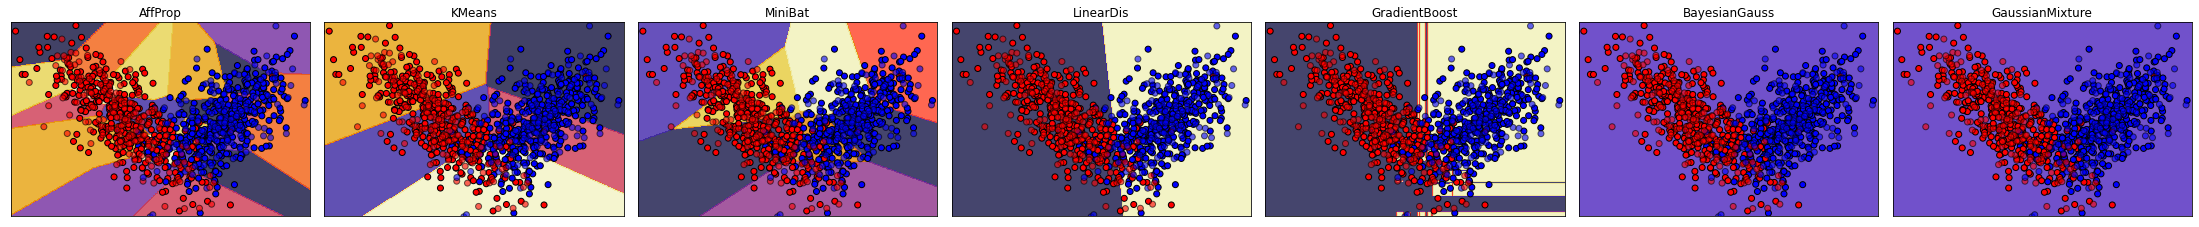

In [135]:
figure = plt.figure(figsize=(35, 9))
i = 1

amin, bmin = X_train.min(axis=0) - 0.1
amax, bmax = X_train.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 300)
vticks = np.linspace(bmin, bmax, 300)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

for name, clf in zip(name_coE, class_coE):
  ax = plt.subplot(len(datasets), len(class_coE) + 1, i)
  model = clf.fit(X_train, y_train)

  c = model.predict(ab)
  cc = c.reshape(aa.shape)
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  cm = plt.cm.CMRmap
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  ax.contourf(aa, bb, cc, cmap=cm, alpha=0.8)

# Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
  ax.set_xlim(amin, amax)
  ax.set_ylim(bmin, bmax)

# Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
  ax.set_xticks(())
  ax.set_yticks(())
  
  ax.set_title(f'{name}')

  i += 1

plt.tight_layout()
plt.show()

# **Plot Manifold**

In [118]:
from sklearn import manifold, datasets

from collections import OrderedDict
from functools import partial
from time import time

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

In [121]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE, locally_linear_embedding
from sklearn.manifold import smacof, spectral_embedding, trustworthiness

In [122]:
n_points = 1000
n_neighbors = 10
n_components = 2
C, color = datasets.make_s_curve(n_points, random_state=0)
print(C.shape)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection="3d")
ax.scatter(C[:, 0], C[:, 1], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(
    manifold.LocallyLinearEmbedding,
    n_neighbors=n_neighbors,
    n_components=n_components,
    eigen_solver="auto")

methods = OrderedDict()
methods["LLE"] = LLE(method="standard")
methods["LTSA"] = LLE(method="ltsa")
methods["Hessian LLE"] = LLE(method="hessian")
methods["Modified LLE"] = LLE(method="modified")
methods["Isomap"] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods["MDS"] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods["SE"] = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
methods["t-SNE"] = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

(1000, 3)


LLE: 0.52 sec
LTSA: 1.1 sec
Hessian LLE: 0.5 sec
Modified LLE: 0.46 sec
Isomap: 0.56 sec
MDS: 3.2 sec
SE: 0.22 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


t-SNE: 8 sec


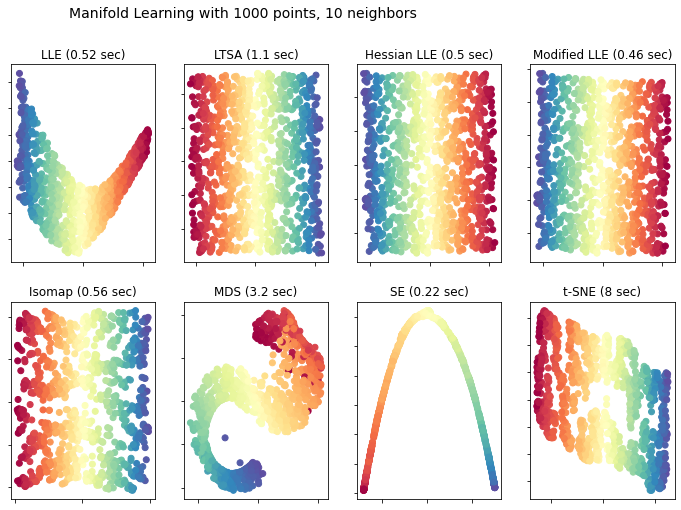

In [123]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors" % (n_points, n_neighbors), fontsize=14)

i = 1

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(C)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

names_bb = [ 'ARDRegression', 'BayesianRidge']
classifiers_bb = [ ARDRegression(), BayesianRidge()]

# **New Data**

In [54]:
from sklearn.datasets import make_regression

A, b = make_regression(n_samples =1000, n_features=2, random_state=0)

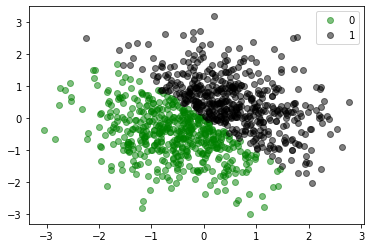

In [62]:
figsize = (8, 4)
fig = plt.plot(figsize=figsize)
plt.plot(A[b<0, 0], A[b<0, 1], 'go', alpha=0.5, label=0)
plt.plot(A[b>1, 0], A[b>1, 1], 'ko', alpha=0.5, label=1)
plt.legend()

In [65]:
#Split Data 
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=43) # TRAIN TEST SPLIT